# pypdfium

In [153]:
import re
from pprint import pprint
import pypdfium2 as pdfium

pdf_path = "bb_2024_gesamt.pdf"

pdf = pdfium.PdfDocument(pdf_path)
pages_text = []
for i in range(len(pdf)):
    page = pdf[i]
    text = page.get_textpage().get_text_range()
    pages_text.append(text)

/home/simon/anaconda3/envs/llm/lib/python3.13/site-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


In [154]:
pages_of_interest = [{'text': page_text, 'page_number': i} for i, page_text in enumerate(pages_text) if 'Wirtschaftsdaten (in Mio. €)' in page_text]

In [155]:
page_numbers = [page['page_number'] for page in pages_of_interest]
print(f"Pages of interest: {page_numbers}")

Pages of interest: [34, 37, 41, 44, 48, 51, 55, 59, 63, 67, 71, 75, 79, 83, 89, 93, 96, 100, 104, 108, 112, 116, 120, 124, 128, 131, 134, 138, 142, 147, 151, 154, 158, 162, 166, 169, 173, 177, 181, 185, 189, 191, 194, 198, 201, 205, 209, 212, 216, 219, 223, 227, 231, 235, 240, 244, 248, 252, 256, 260]


In [255]:
pprint(pages_of_interest[1])

{'page_number': 37,
 'text': 'Wirtschaftsdaten (in Mio. €)\r\n'
         'Bilanzdaten 2023 2022 2021 2020 2019\r\n'
         'Bilanzsumme 102,87 97,33 97,93 93,96 92,32 - Anlagevermögen 89,16 '
         '89,55 89,99 90,70 91,02 - Sachanlagen 89,16 89,55 89,99 90,70 91,02 '
         '- Finanzanlagen --- --- --- --- --- - Umlaufvermögen 13,71 7,78 7,93 '
         '3,26 1,30 - Eigenkapital 89,62 90,25 91,86 87,65 85,97 - Rücklagen '
         '73,25 74,86 71,68 71,68 71,68 - Sonderposten für Zuschüsse 7,75 1,85 '
         '2,28 2,48 2,93 - Fremdkapital 5,50 5,24 3,79 3,82 3,43 - '
         'Rückstellungen 4,77 4,59 3,03 2,94 2,97 - Verbindlichkeiten 0,73 '
         '0,64 0,75 0,88 0,46 - Kreditverbindlichkeiten --- --- --- --- ---\r\n'
         'GuV-Daten\r\n'
         'Gesamterträge 1,97 2,14 6,68 3,92 2,01 - Umsatzerlöse 1,32 1,51 1,52 '
         '1,36 1,30 - Übrige Erträge 0,66 0,63 5,16 2,56 0,71\r\n'
         'Gesamtaufwendungen 2,65 3,74 2,32 2,23 4,72 - Personalaufwand --- '
       

In [326]:
def extract_numbers(text):
    text = re.sub(r'(-?([\.\d]+),?(\d*))', r' \1', text) # seperate numbers with spaces
    # pprint(text)
    # Only match spaces that are not preceded by \r or \n
    pattern = r'((?:-?[a-zA-ZäöüÄÖÜß² /\.\(\)%€]+)(?:(?:[^\r\n]\s*-?[\.\d]+(?:,[\d]+)?)|(?:\s---)){2,})'
    matches = []
    for match in re.findall(pattern, text):
        s = match
        # print(s)
        # Split before every number or '---'
        split_parts = re.split(r'(?=\s+-?(?:\d+\.?\d*)(?:,[\d]+)?)|(?=\s---)', s)
        matches.append([part.strip() for part in split_parts if part.strip()])
    return matches

pprint(extract_numbers(pages_of_interest[40]['text']))

[['Bilanzdaten', '2023', '2022'],
 ['Bilanzsumme', '0,77', '0,40'],
 ['- Anlagevermögen', '0,01', '0,00'],
 ['- Sachanlagen', '0,01', '0,00'],
 ['- Finanzanlagen', '---', '---'],
 ['- Umlaufvermögen', '0,76', '0,40'],
 ['- Eigenkapital', '0,75', '0,39'],
 ['- Rücklagen', '---', '---'],
 ['- Sonderposten für Zuschüsse', '---', '---'],
 ['- Fremdkapital', '0,02', '0,01'],
 ['- Rückstellungen', '0,02', '0,01'],
 ['- Verbindlichkeiten', '0,01', '0,00'],
 ['- Kreditverbindlichkeiten', '---', '---'],
 ['Gesamterträge', '0,00', '0,00'],
 ['- Umsatzerlöse', '---', '---'],
 ['- Übrige Erträge', '0,00', '0,00'],
 ['Gesamtaufwendungen', '0,25', '0,11'],
 ['- Personalaufwand', '0,15', '0,07'],
 ['- Abschreibungen', '---', '---'],
 ['- Zinsaufwand', '---', '---'],
 ['- Übrige Aufwendungen', '0,10', '0,04'],
 ['EBITDA', '-0,25', '-0,11'],
 ['EBT', '-0,25', '-0,11'],
 ['Jahresergebnis', '-0,25', '-0,11'],
 ['Gewinnabführung', '---', '---'],
 ['- davon Auszubildende', '---', '---'],
 ['Zuführungen', '

In [318]:
matches_reference = extract_numbers(pages_of_interest[0]['text'])
pprint(matches_reference)

[['Bilanzdaten', '2023', '2022', '2021', '2020', '2019'],
 ['Bilanzsumme', '28,16', '29,07', '28,41', '20,97', '15,30'],
 ['- Anlagevermögen', '11,83', '12,19', '11,74', '9,80', '7,67'],
 ['- Sachanlagen', '0,20', '0,29', '0,44', '0,47', '0,48'],
 ['- Finanzanlagen', '11,40', '11,40', '10,70', '9,00', '7,00'],
 ['- Umlaufvermögen', '15,83', '16,42', '16,33', '10,72', '7,29'],
 ['- Eigenkapital', '1,81', '2,62', '1,67', '1,08', '1,32'],
 ['- Rücklagen', '---', '---', '---', '---', '---'],
 ['- Sonderposten für Zuschüsse', '0,43', '0,79', '1,04', '0,58', '0,67'],
 ['- Fremdkapital', '25,89', '25,61', '25,64', '19,29', '13,31'],
 ['- Rückstellungen', '17,24', '15,49', '13,40', '12,20', '10,79'],
 ['- Verbindlichkeiten', '8,65', '10,12', '12,24', '7,09', '2,52'],
 ['- Kreditverbindlichkeiten', '---', '---', '---', '---', '---'],
 ['Gesamterträge', '44,55', '68,33', '49,48', '41,09', '38,71'],
 ['- Umsatzerlöse', '42,14', '66,89', '48,46', '39,80', '37,39'],
 ['- Übrige Erträge', '2,40', '1

In [319]:
common_row_names = [entry[0] for entry in matches_reference[1:37]]
common_row_names

['Bilanzsumme', '- Anlagevermögen', '- Sachanlagen', '- Finanzanlagen', '- Umlaufvermögen', '- Eigenkapital', '- Rücklagen', '- Sonderposten für Zuschüsse', '- Fremdkapital', '- Rückstellungen', '- Verbindlichkeiten', '- Kreditverbindlichkeiten', 'Gesamterträge', '- Umsatzerlöse', '- Übrige Erträge', 'Gesamtaufwendungen', '- Personalaufwand', '- Abschreibungen', '- Zinsaufwand', '- Übrige Aufwendungen', 'EBITDA', 'EBT', 'Jahresergebnis', 'Gewinnabführung', 'Beschäftigte', '- davon Auszubildende', 'Zuführungen', '- Zuführungen Land Berlin', 'Investitionen', 'Investitionsquote (%)', 'Umsatz pro Vollzeitkraft (T €)', 'Eigenkapitalquote (%)', 'Eigenkapitalrentabilität (%)', 'Umsatzrentabilität (%)', 'Zinslastquote (%)', 'Personalkostenquote (%)']

In [320]:
import re

page = [page['text'] for page in pages_of_interest if page['page_number'] == 37][0]
# Insert a space before every number (integer or float, with ',' as decimal separator)
page_with_spaces = re.sub(r'(-?(\d+),?(\d*))', r' \1', page)
# pprint(page_with_spaces)

In [328]:
import numpy as np

def check_extraction(pages, show_missing_rows=False, show_additional_rows=False, show_irregular_rows=False):
    for idx, entry in enumerate(pages):
        print(f"Processing page {entry['page_number']}, entry {idx}")
        # print(entry['text'][:100])
        matches = extract_numbers(entry['text'])

        n_cols = int(np.median([len(row) for row in matches]))
        # print(n_cols)
        long_rows = [row for row in matches if len(row) > n_cols]
        short_rows = [row for row in matches if len(row) < n_cols]
        
        if long_rows and show_irregular_rows:
            print(f"Long rows found on page {entry['page_number']}:")
            pprint(long_rows)
        if short_rows and show_irregular_rows:
            print(f"Short rows found on page {entry['page_number']}:")
            pprint(short_rows)

        # print(matches)
        row_names = [entry[0] for entry in matches]
        # print([entry[0] for entry in matches][-1:])
        missing_rows = set(common_row_names).difference(set(row_names))
        last_regular_index = [idx for idx, row_name in enumerate(row_names) if row_name == 'Personalkostenquote (%)'][0]
        # print(f"Last regular index: {last_regular_index}")


        if missing_rows and show_missing_rows:
            print(f"Missing in row: {missing_rows}")

        additional_rows = set(row_names[1:last_regular_index+1]).difference(set(common_row_names))
        if additional_rows and show_additional_rows:
            print(f"Additional in row: {additional_rows}")

check_extraction(pages_of_interest[:], show_missing_rows=False, show_additional_rows=True, show_irregular_rows=False)

Processing page 34, entry 0
Processing page 37, entry 1
Processing page 41, entry 2
Processing page 44, entry 3
Processing page 48, entry 4
Processing page 51, entry 5
Processing page 55, entry 6
Processing page 59, entry 7
Processing page 63, entry 8
Processing page 67, entry 9
Processing page 71, entry 10
Processing page 75, entry 11
Processing page 79, entry 12
Processing page 83, entry 13
Processing page 89, entry 14
Processing page 93, entry 15
Processing page 96, entry 16
Processing page 100, entry 17
Processing page 104, entry 18
Processing page 108, entry 19
Processing page 112, entry 20
Processing page 116, entry 21
Processing page 120, entry 22
Processing page 124, entry 23
Processing page 128, entry 24
Processing page 131, entry 25
Processing page 134, entry 26
Processing page 138, entry 27
Processing page 142, entry 28
Processing page 147, entry 29
Processing page 151, entry 30
Processing page 154, entry 31
Processing page 158, entry 32
Processing page 162, entry 33
Process

# tabula

In [23]:
import tabula as tb
import numpy as np

for p_no in page_numbers[0:1]:
    df = tb.read_pdf(
        pdf_path, 
        pages=p_no+1,
        area=(67.346, 53.132, 806.287, 550.225), 
        columns=[250, 300, 355, 415, 475],
        output_format='dataframe', 
        multiple_tables=False, 
        stream=True,
        guess=False,
        # pandas_options={'keep_default_na': False, 'na_filter': False}
    )
df[0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Bilanzdaten,2023,2022,2021,2020,2019
1,Bilanzsumme,"28,16","29,07","28,41","20,97","15,30"
2,- Anlagevermögen,"11,83","12,19","11,74","9,80","7,67"
3,- Sachanlagen,"0,20","0,29","0,44","0,47","0,48"
4,- Finanzanlagen,"11,40","11,40","10,70","9,00","7,00"
5,- Umlaufvermögen,"15,83","16,42","16,33","10,72","7,29"
6,- Eigenkapital,"1,81","2,62","1,67","1,08","1,32"
7,- Sonderposten für Zuschüsse,"0,43","0,79","1,04","0,58","0,67"
8,- Fremdkapital,"25,89","25,61","25,64","19,29","13,31"
9,- Rückstellungen,"17,24","15,49","13,40","12,20","10,79"


In [20]:
df[0].columns = ['Bezeichnung'] + df[0].loc[0][1:].to_list()
df[0]['Bezeichnung'].to_list()

['Bilanzsumme',
 '- Anlagevermögen',
 '- Sachanlagen',
 '- Umlaufvermögen',
 '- Eigenkapital',
 '- Rücklagen',
 '- Sonderposten für Zuschüsse',
 '- Fremdkapital',
 '- Rückstellungen',
 '- Verbindlichkeiten',
 'GuV-Daten',
 'Gesamterträge',
 '- Umsatzerlöse',
 '- Übrige Erträge',
 'Gesamtaufwendungen',
 '- Abschreibungen',
 '- Übrige Aufwendungen',
 'EBITDA',
 'EBT',
 'Jahresergebnis',
 'Gewinnabführung',
 'Beschäftigte',
 'Beschäftigte',
 'Allgemeine Daten',
 'Zuführungen',
 '- Zuführungen Land Berlin',
 'Investitionen',
 'Investitionsquote (%)',
 'Umsatz pro Vollzeitkraft (T €)',
 'Eigenkapitalquote (%)',
 'Eigenkapitalrentabilität (%)',
 'Umsatzrentabilität (%)',
 'Zinslastquote (%)',
 'Personalkostenquote (%)',
 'Spezifische Daten',
 'Anzahl Grundstücke (Anz.)',
 'Größe Flächenbestand (Tsd. m2)']

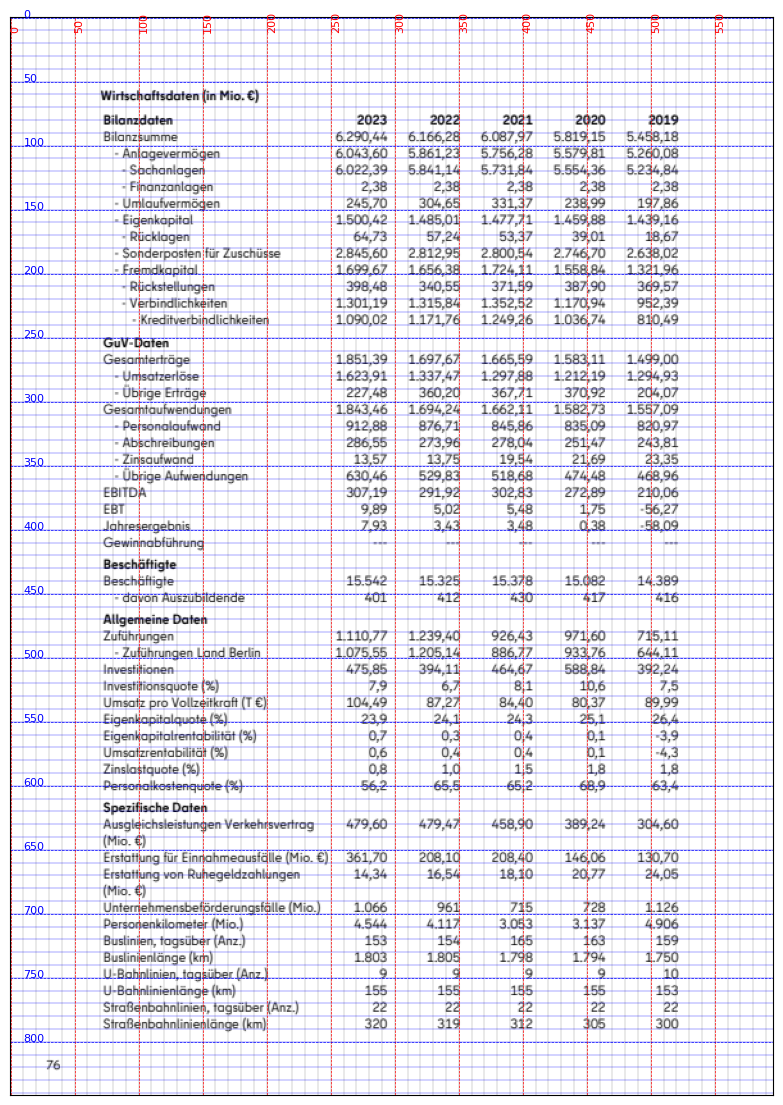

In [438]:
import matplotlib.pyplot as plt

page = pdf[p-1]

# Render the page as an image (DPI 72 means 1 point = 1 pixel)
bitmap = page.render(scale=1)
img = bitmap.to_pil()

fig, ax = plt.subplots(figsize=(10, 14))
ax.imshow(img)

for x in np.arange(0, img.width, 10):
    ax.axvline(x, color='gray', linewidth=0.25, linestyle='-')
for y in np.arange(0, img.height, 10):
    ax.axhline(y, color='blue', linewidth=0.25, linestyle='-')

# Draw grid lines every 50 points (adjust as needed)
for x in np.arange(0, img.width, 50):
    ax.axvline(x, color='red', linewidth=0.5, linestyle='--')
    ax.text(x, 10, str(x), color='red', fontsize=8, rotation=90)
for y in np.arange(0, img.height, 50):
    ax.axhline(y, color='blue', linewidth=0.5, linestyle='--')
    ax.text(10, y, str(y), color='blue', fontsize=8)

ax.set_xticks([])
ax.set_yticks([])
plt.show()

# Marker

In [1]:
from marker.converters.table import TableConverter
from marker.models import create_model_dict
from marker.output import text_from_rendered
from marker.config.parser import ConfigParser

pdf_path = "bb_2024_gesamt.pdf"

config = {
    "paginate_output": True,
    "page_range": "33-262"
    }
config_parser = ConfigParser(config)

converter = TableConverter(
    config=config_parser.generate_config_dict(),
    artifact_dict=create_model_dict(),
)
rendered = converter(pdf_path)
text, _, images = text_from_rendered(rendered)

Loaded layout model s3://layout/2025_02_18 on device cpu with dtype torch.float32
Loaded texify model s3://texify/2025_02_18 on device cpu with dtype torch.float32
Loaded recognition model s3://text_recognition/2025_02_18 on device cpu with dtype torch.float32
Loaded table recognition model s3://table_recognition/2025_02_18 on device cpu with dtype torch.float32
Loaded detection model s3://text_detection/2025_02_28 on device cpu with dtype torch.float32
Loaded detection model s3://inline_math_detection/2025_02_24 on device cpu with dtype torch.float32


Running OCR Error Detection: 100%|██████████| 58/58 [00:54<00:00,  1.06it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Recognizing tables: 100%|██████████| 57/57 [14:02<00:00, 14.77s/it]


In [10]:
import re

pages = re.split(r'\{\d+\}-*\n+', text)

In [11]:
len(pages)

231

In [7]:
from IPython.display import display, Markdown

display(Markdown(pages[2]))

| Bilanzdaten                                   | 2023         | 2022         | 2021         | 2020         | 2019         |
|-----------------------------------------------|--------------|--------------|--------------|--------------|--------------|
| Bilanzsumme                                   | 28,16        | 29,07        | 28,41        | 20,97        | 15,30        |
| - Anlagevermögen                              | 11,83        | 12,19        | 11,74        | 9,80         | 7,67         |
| - Sachanlagen                                 | 0,20         | 0,29         | 0,44         | 0,47         | 0,48         |
| - Finanzanlagen                               | 11,40        | 11,40        | 10,70        | 9,00         | 7,00         |
| - Umlaufvermögen                              | 15,83        | 16,42        | 16,33        | 10,72        | 7,29         |
| - Eigenkapital                                | 1,81         | 2,62         | 1,67         | 1,08         | 1,32         |
| - Rücklagen                                   | ---          | ---          | ---          | ---          | ---          |
| - Sonderposten für Zuschüsse                  | 0,43         | 0,79         | 1,04         | 0,58         | 0,67         |
| - Fremdkapital                                | 25,89        | 25,61        | 25,64        | 19,29        | 13,31        |
| - Rückstellungen                              | 17,24        | 15,49        | 13,40        | 12,20        | 10,79        |
| - Verbindlichkeiten                           | 8,65         | 10,12        | 12,24        | 7,09         | 2,52         |
| - Kreditverbindlichkeiten                     | ---          | ---          | ---          | ---          | ---          |
| GuV-Daten                                     |              |              |              |              |              |
| Gesamterträge                                 | 44,55        | 68,33        | 49,48        | 41,09        | 38,71        |
| - Umsatzerlöse                                | 42,14        | 66,89        | 48,46        | 39,80        | 37,39        |
| - Übrige Erträge                              | 2,40         | 1,44         | 1,02         | 1,29         | 1,31         |
| Gesamtaufwendungen                            | 45,36        | 67,37        | 48,89        | 41,33        | 40,93        |
| - Personalaufwand                             | 30,85        | 35,29        | 30,58        | 29,69        | 29,00        |
| - Abschreibungen                              | 0,41         | 0,45         | 0,35         | 0,29         | 0,33         |
| - Zinsaufwand                                 | 0,21         | 0,20         | 0,23         | 0,24         | 0,20         |
| - Übrige Aufwendungen                         | 13,88        | 31,43        | 17,73        | 11,11        | 11,40        |
| EBITDA                                        | -0,64        | 1,06         | 1,14         | 0,26         | -1,72        |
| EBT                                           | -0,81        | 0,95         | 0,59         | -0,25        | -2,23        |
| Jahresergebnis                                | -0,81        | 0,95         | 0,59         | -0,24        | -2,23        |
| Gewinnabführung                               | ---          | ---          | ---          | ---          | ---          |
| Beschäftigte                                  |              |              |              |              |              |
| Beschäftigte                                  | 458          | 577          | 482          | 466          | 434          |
| - davon Auszubildende                         | 2            | 4            | 7            | 9            | 4            |
| Allgemeine Daten                              |              |              |              |              |              |
| Zuführungen                                   | 41,65        | 66,55        | 45,56        | 38,95        | 36,72        |
| - Zuführungen Land Berlin                     | 21,01        | 34,90        | 21,94        | 21,32        | 18,61        |
|                                               |              |              |              |              |              |
| Investitionen<br>Investitionsquote (%)        | 0,05<br>12,0 | 0,21<br>26,1 | 0,55<br>53,2 | 0,43<br>53,3 | 0,20<br>29,3 |
| Umsatz pro Vollzeitkraft (T €)                | 92,02        | 115,92       | 100,54       | 85,41        | 86,15        |
|                                               |              |              |              |              |              |
| Eigenkapitalquote (%)                         | 6,4          | 9,0          | 5,9          | 5,1          | 8,6          |
| Eigenkapitalrentabilität (%)                  | -44,7        | 36,4         | 35,5         | -22,9        | -169,2       |
| Umsatzrentabilität (%)<br>Zinslastquote (%)   | -1,9<br>0,5  | 1,4<br>0,3   | 1,2<br>0,5   | -0,6<br>0,6  | -6,0<br>0,5  |
|                                               |              |              |              |              |              |
| Personalkostenquote (%)                       | 73,2         | 52,8         | 63,1         | 74,6         | 77,6         |
| Spezifische Daten                             |              |              |              |              |              |
| Dezentrale Bundesstatistiken (Anz.)           | 227          | 232          | 233          | 223          | 214          |
| - darunter mit EU-Rechtsgrundlage (Anz.)      | 77           | 82           | 83           | 88           | 84           |
| Länderstatistiken (Anz.)                      | 39           | 39           | 38           | 38           | 38           |
| - davon Koordinierte Länderstatistiken (Anz.) | 14           | 14           | 14           | 14           | 14           |
| - davon Generelle Länderstatistiken (Anz.)    | 21           | 21           | 21           | 21           | 21           |
| - davon Spezielle Länderstatistiken (Anz.)    | 4            | 4            | 3            | 3            | 3            |



In [19]:
pages[2]

'| Bilanzdaten                                   | 2023         | 2022         | 2021         | 2020         | 2019         |\n|-----------------------------------------------|--------------|--------------|--------------|--------------|--------------|\n| Bilanzsumme                                   | 28,16        | 29,07        | 28,41        | 20,97        | 15,30        |\n| - Anlagevermögen                              | 11,83        | 12,19        | 11,74        | 9,80         | 7,67         |\n| - Sachanlagen                                 | 0,20         | 0,29         | 0,44         | 0,47         | 0,48         |\n| - Finanzanlagen                               | 11,40        | 11,40        | 10,70        | 9,00         | 7,00         |\n| - Umlaufvermögen                              | 15,83        | 16,42        | 16,33        | 10,72        | 7,29         |\n| - Eigenkapital                                | 1,81         | 2,62         | 1,67         | 1,08         | 1,32   

In [102]:
with open("tables.md", "w", encoding="utf-8") as f:
    f.write(text)

In [414]:
with open("tables.md", "r", encoding="utf-8") as f:
    text = f.read()

In [415]:
import re
pages = re.split(r'\{\d+\}-*\n+', text)

In [416]:
pages_of_interest = [page for page in pages if "Bilanzdaten" in page]
len(pages_of_interest)

60

In [417]:
import pandas as pd
from io import StringIO
import numpy as np

# Assuming pages[2] contains a markdown table, extract it and convert to DataFrame

markdown_table = pages[2]

def markdown_table_to_df(markdown_table, verbose=False):
    df = pd.read_csv(StringIO(markdown_table), sep="|", engine="python", skipinitialspace=True)
    df = df.dropna(axis=1, how='all')

    df = df.dropna(axis=1, how='all')  # Drop empty columns if any
    df = df.dropna(axis=0, how='all')  # Drop empty rows if any
    df.columns = [col.strip() for col in df.columns]  # Clean column names
    df = df.map(lambda x: str(x).strip() if isinstance(x, str) else x) # Strip whitespace from all cells
    df = df[~df.apply(lambda row: all(re.fullmatch(r'-+', str(cell).strip()) for cell in row), axis=1)] # remove rows with all cells containing only dashes
    df.reset_index(drop=True, inplace=True)

    year_columns = [col for col in df.columns if str(col).strip().isdigit() and 1900 <= int(col) <= 2100]
    year_columns

    # Insert a new row at the top with the first column set to the first cell value, others as NaN
    first_col = df.columns[0]
    first_cell = df.columns[0]
    new_row = {col: (first_cell if col == first_col else np.nan) for col in df.columns}
    df = pd.concat([pd.DataFrame([new_row]), df], ignore_index=True)

    df.rename(columns={df.columns[0]: 'H3'}, inplace=True)

    # Find rows where all cells contain "<br>" and split them
    rows_with_br = df.apply(lambda row: all("<br>" in str(cell) for cell in row), axis=1)
    new_rows = []
    for idx, row in df.iterrows():
        if rows_with_br[idx]:
            before = [str(cell).split("<br>")[0].strip() for cell in row]
            after = [str(cell).split("<br>")[1].strip() if "<br>" in str(cell) else "" for cell in row]
            new_rows.append(pd.Series(before, index=df.columns))
            new_rows.append(pd.Series(after, index=df.columns))
        else:
            new_rows.append(row)

    df = pd.DataFrame(new_rows, columns=df.columns).reset_index(drop=True)

    # find top hierarchy entries
    mask = df.drop('H3', axis=1).isna().all(axis=1)
    col_h1 = [entry if bool else np.nan for entry, bool in zip(df['H3'], mask)]
    # Insert new column at position 1 with this value for all rows
    df.insert(0, 'H1', col_h1)
    df['H1'] = df['H1'].ffill()
    df = df.dropna(subset=year_columns, how='all')

    # find second hierarchy entries
    mask = ~df['H3'].str.startswith('-')
    col_h2 = [entry if bool else np.nan for entry, bool in zip(df['H3'], mask)]
    df.insert(1, 'H2', col_h2)
    df['H2'] = df['H2'].ffill()

    # missing value instead of "---"; missing means not applicable for company
    df = df.map(lambda x: np.nan if str(x).startswith('---') else x)

    # Convert the last 5 columns to numeric, using ',' as the decimal separator
    for col in year_columns:
        df[col] = df[col].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

def split_dataframe(df, col_name='H1'):
    dfs_by_col_name = {h1: group.reset_index(drop=True) for h1, group in df.groupby(col_name)}
    return dfs_by_col_name

df = markdown_table_to_df(markdown_table)
len(df)

42

In [418]:
dfs_by_h1 = split_dataframe(df, col_name='H1')
dfs_by_h1

{'Allgemeine Daten':                  H1                              H2  \
 0  Allgemeine Daten                     Zuführungen   
 1  Allgemeine Daten                     Zuführungen   
 2  Allgemeine Daten                   Investitionen   
 3  Allgemeine Daten           Investitionsquote (%)   
 4  Allgemeine Daten  Umsatz pro Vollzeitkraft (T €)   
 5  Allgemeine Daten           Eigenkapitalquote (%)   
 6  Allgemeine Daten    Eigenkapitalrentabilität (%)   
 7  Allgemeine Daten          Umsatzrentabilität (%)   
 8  Allgemeine Daten               Zinslastquote (%)   
 9  Allgemeine Daten         Personalkostenquote (%)   
 
                                H3   2023    2022    2021   2020    2019  
 0                     Zuführungen  41.65   66.55   45.56  38.95   36.72  
 1       - Zuführungen Land Berlin  21.01   34.90   21.94  21.32   18.61  
 2                   Investitionen   0.05    0.21    0.55   0.43    0.20  
 3           Investitionsquote (%)  12.00   26.10   53.20  53.

In [419]:
def process_hierarchy_2_and_3(df):
    df_temp = df.copy()
    df_temp['H3'] = [str(h3).replace("- ", "") if h3 != h2 else np.nan for h2, h3 in zip(df_temp['H2'], df_temp['H3'])]
    return df_temp

df_temp = process_hierarchy_2_and_3(dfs_by_h1['Allgemeine Daten'])
df_temp

,H1,H2,H3,2023,2022,2021,2020,2019
0,Allgemeine Daten,Zuführungen,NaN,41.65,66.55,45.56,38.95,36.72
1,Allgemeine Daten,Zuführungen,Zuführungen Land Berlin,21.01,34.90,21.94,21.32,18.61
2,Allgemeine Daten,Investitionen,NaN,0.05,0.21,0.55,0.43,0.20
3,Allgemeine Daten,Investitionsquote (%),NaN,12.00,26.10,53.20,53.30,29.30
4,Allgemeine Daten,Umsatz pro Vollzeitkraft (T €),NaN,92.02,115.92,100.54,85.41,86.15
5,Allgemeine Daten,Eigenkapitalquote (%),NaN,6.40,9.00,5.90,5.10,8.60
6,Allgemeine Daten,Eigenkapitalrentabilität (%),NaN,-44.70,36.40,35.50,-22.90,-169.20
7,Allgemeine Daten,Umsatzrentabilität (%),NaN,-1.90,1.40,1.20,-0.60,-6.00
8,Allgemeine Daten,Zinslastquote (%),NaN,0.50,0.30,0.50,0.60,0.50
9,Allgemeine Daten,Personalkostenquote (%),NaN,73.20,52.80,63.10,74.60,77.60


In [420]:
df_temp = process_hierarchy_2_and_3(dfs_by_h1['Beschäftigte'])
df_temp

,H1,H2,H3,2023,2022,2021,2020,2019
0,Beschäftigte,Beschäftigte,NaN,458.0,577.0,482.0,466.0,434.0
1,Beschäftigte,Beschäftigte,davon Auszubildende,2.0,4.0,7.0,9.0,4.0


In [421]:
df_temp = process_hierarchy_2_and_3(dfs_by_h1['Spezifische Daten'])
df_temp

,H1,H2,H3,2023,2022,2021,2020,2019
0,Spezifische Daten,Dezentrale Bundesstatistiken (Anz.),NaN,227.0,232.0,233.0,223.0,214.0
1,Spezifische Daten,Dezentrale Bundesstatistiken (Anz.),darunter mit EU-Rechtsgrundlage (Anz.),77.0,82.0,83.0,88.0,84.0
2,Spezifische Daten,Länderstatistiken (Anz.),NaN,39.0,39.0,38.0,38.0,38.0
3,Spezifische Daten,Länderstatistiken (Anz.),davon Koordinierte Länderstatistiken (Anz.),14.0,14.0,14.0,14.0,14.0
4,Spezifische Daten,Länderstatistiken (Anz.),davon Generelle Länderstatistiken (Anz.),21.0,21.0,21.0,21.0,21.0
5,Spezifische Daten,Länderstatistiken (Anz.),davon Spezielle Länderstatistiken (Anz.),4.0,4.0,3.0,3.0,3.0


In [422]:
df_temp = process_hierarchy_2_and_3(dfs_by_h1['GuV-Daten'])
df_temp

,H1,H2,H3,2023,2022,2021,2020,2019
0,GuV-Daten,Gesamterträge,NaN,44.55,68.33,49.48,41.09,38.71
1,GuV-Daten,Gesamterträge,Umsatzerlöse,42.14,66.89,48.46,39.80,37.39
2,GuV-Daten,Gesamterträge,Übrige Erträge,2.40,1.44,1.02,1.29,1.31
3,GuV-Daten,Gesamtaufwendungen,NaN,45.36,67.37,48.89,41.33,40.93
4,GuV-Daten,Gesamtaufwendungen,Personalaufwand,30.85,35.29,30.58,29.69,29.00
5,GuV-Daten,Gesamtaufwendungen,Abschreibungen,0.41,0.45,0.35,0.29,0.33
6,GuV-Daten,Gesamtaufwendungen,Zinsaufwand,0.21,0.20,0.23,0.24,0.20
7,GuV-Daten,Gesamtaufwendungen,Übrige Aufwendungen,13.88,31.43,17.73,11.11,11.40
8,GuV-Daten,EBITDA,NaN,-0.64,1.06,1.14,0.26,-1.72
9,GuV-Daten,EBT,NaN,-0.81,0.95,0.59,-0.25,-2.23


In [423]:
def replace_spaces_with_pipe(match):
    return match.group(0).replace(' ', '|')

def fix_gruen_berlin_string(s):
    s = s.replace('<br>', '|')
    s = re.sub(r'((\\n)?(\|( )+)+)|((\\n)?(\|(-){4,})+\|)', '', s)
    s = re.sub(r'((- )?[a-zA-ZäöüßÄÖÜ \(\)%\.€]+(\|(([0-9]+(,[0-9]+)?)|-{3})){5})', r'\1|\n', s)
    s = re.sub(r'( ){2,}', '', s)
    s = re.sub(r'(\|\n){2,}', '', s)
    s = re.sub(r'([a-zA-ZäöüÄÖÜß]+)\|([a-zA-ZäöüÄÖÜß]+)', r'\1||||||\n\2', s)
    s = re.sub(r'(\n\n)', '\n', s)
    s = s.replace(' Bilanzdaten2023 2022 2021 2020 2019 |\n', '')
    s = re.sub(r'( (([0-9]+(,[0-9]+)?))){5}', replace_spaces_with_pipe, s)
    s = '| Bilanzdaten | 2023 | 2022 | 2021 | 2020 | 2019 |\n|----|----|----|----|----|----|\n'+s
    s = re.sub(r'(\|\n)((- )?[a-zA-ZäöüßÄÖÜ\(\)%\.€]+)', r'\1|\2', s)
    return s

s = pages_of_interest[30]
s_fixed = fix_gruen_berlin_string(s)
# Markdown(s_fixed)

In [425]:
def clean_page_text(page):
    page = page.replace('GuV<br>-Daten', 'GuV-Daten')
    return page

for idx, page in enumerate(pages_of_interest):
    try:
        try:
            page = clean_page_text(page)
            df = markdown_table_to_df(page)
        except Exception as e:
            page_fixed = fix_gruen_berlin_string(page)
            df = markdown_table_to_df(page_fixed, verbose=False)

        dfs_by_h1 = split_dataframe(df, col_name='H1')

        # check keys
        expected_keys = ['Allgemeine Daten', 'Beschäftigte', 'Bilanzdaten', 'GuV-Daten', 'Spezifische Daten']
        if not all(key in dfs_by_h1.keys() for key in expected_keys):
            missing_keys = [key for key in expected_keys if key not in dfs_by_h1.keys()]
            print(f"Page {idx} missing keys: {missing_keys}")

        unexpected_keys = [key for key in dfs_by_h1.keys() if key not in expected_keys]
        if unexpected_keys:
            print(f"Page {idx} unexpected keys: {unexpected_keys}")
        
        for h1, df_h1 in dfs_by_h1.items():
            match h1:
                case 'Allgemeine Daten':
                    df_temp = process_hierarchy_2_and_3(df_h1)
                    if df_temp.shape[0] != 10:
                        # print(f"Page {idx} - {h1}:\n", page)
                        # print(df_temp)
                        pass
                case 'Beschäftigte':
                    df_temp = process_hierarchy_2_and_3(df_h1)
                    if df_temp.shape[0] != 2:
                        # print(f"Page {idx} - {h1}:\n", page)
                        # print(df_temp)
                        pass
    except Exception as e:
        print(f"Error processing page {idx}: {e}")
        continue

Page 2 missing keys: ['Spezifische Daten']
Page 3 unexpected keys: ['(Tsd. m²)']
Page 4 missing keys: ['Allgemeine Daten', 'Beschäftigte', 'Bilanzdaten', 'GuV-Daten', 'Spezifische Daten']
Page 5 unexpected keys: ['(Anz.)']
Page 7 unexpected keys: ['Contracting (Mio. €)']
Page 9 missing keys: ['GuV-Daten']
Page 11 unexpected keys: ['(Mio. €)']
Page 12 missing keys: ['Allgemeine Daten']
Page 12 unexpected keys: ['muliert) (MW)']
Page 15 missing keys: ['Spezifische Daten']
Page 16 missing keys: ['Spezifische Daten']
Page 17 unexpected keys: ['schäftsbesorgung (Mio. €)']
Page 18 unexpected keys: ['Park (Anz.)']
Page 19 missing keys: ['Spezifische Daten']
Page 20 unexpected keys: ['Aufwendungen (€/m²)']
Page 23 missing keys: ['Spezifische Daten']
Page 28 unexpected keys: ['Aufwendungen (€/m²)']
Page 29 unexpected keys: ['Aufwendungen (€/m²)']
Page 33 unexpected keys: ['Aufwendungen (€/m²)']
Page 40 missing keys: ['Allgemeine Daten', 'Beschäftigte', 'Bilanzdaten', 'GuV-Daten', 'Spezifische D

In [426]:
Markdown(pages_of_interest[3])

| Bilanzdaten                          | 2023   | 2022   | 2021   | 2020   | 2019   |
|--------------------------------------|--------|--------|--------|--------|--------|
| Bilanzsumme                          | 96,67  | 96,41  | 94,10  | 98,16  | 101,00 |
| - Anlagevermögen                     | 72,75  | 74,61  | 75,38  | 77,49  | 81,08  |
| - Sachanlagen                        | 59,80  | 61,64  | 62,26  | 64,34  | 68,07  |
| - Finanzanlagen                      | 12,68  | 12,68  | 12,81  | 12,81  | 12,68  |
| - Umlaufvermögen                     | 23,84  | 21,76  | 18,68  | 20,60  | 19,87  |
| - Eigenkapital                       | 57,18  | 54,36  | 52,19  | 50,74  | 50,78  |
| - Rücklagen                          | 0,79   | 0,79   | 0,79   | 0,79   | 0,79   |
| - Sonderposten für Zuschüsse         | 7,28   | 8,60   | 9,95   | 11,40  | 13,03  |
| - Fremdkapital                       | 14,21  | 14,82  | 12,54  | 15,93  | 16,39  |
| - Rückstellungen                     | 10,92  | 10,77  | 8,19   | 9,54   | 9,07   |
| - Verbindlichkeiten                  | 3,29   | 4,05   | 4,36   | 6,39   | 7,33   |
| - Kreditverbindlichkeiten            | ---    | ---    | 0,87   | 1,72   | 2,54   |
| GuV<br>-Daten                        |        |        |        |        |        |
| Gesamterträge                        | 27,51  | 26,47  | 24,35  | 25,14  | 25,44  |
| - Umsatzerlöse                       | 22,94  | 22,60  | 20,52  | 21,25  | 21,45  |
| - Übrige Erträge                     | 4,57   | 3,87   | 3,83   | 3,88   | 3,99   |
| Gesamtaufwendungen                   | 24,69  | 24,30  | 22,90  | 23,71  | 22,79  |
| - Personalaufwand                    | 8,42   | 8,20   | 7,89   | 7,70   | 7,08   |
| - Abschreibungen                     | 4,56   | 4,57   | 4,75   | 5,34   | 5,29   |
| - Zinsaufwand                        | 0,10   | 0,08   | 0,14   | 0,21   | 0,24   |
| - Übrige Aufwendungen                | 11,62  | 11,44  | 10,13  | 10,46  | 10,18  |
| EBITDA                               | 7,63   | 7,39   | 6,86   | 6,69   | 8,82   |
| EBT                                  | 4,32   | 3,42   | 2,36   | 2,13   | 4,66   |
| Jahresergebnis                       | 2,82   | 2,17   | 1,45   | 1,42   | 2,65   |
| Gewinnabführung                      | ---    | ---    | ---    | ---    | 1,47   |
| Beschäftigte                         |        |        |        |        |        |
| Beschäftigte                         | 127    | 128    | 128    | 121    | 118    |
| - davon Auszubildende                | 9      | 9      | 9      | 7      | 3      |
| Allgemeine Daten                     |        |        |        |        |        |
| Zuführungen                          | ---    | ---    | ---    | ---    | ---    |
| - Zuführungen Land Berlin            | ---    | ---    | ---    | ---    | ---    |
| Investitionen                        | 2,90   | 3,94   | 2,64   | 1,67   | 5,19   |
| Investitionsquote (%)                | 4,8    | 6,4    | 4,2    | 2,6    | 7,6    |
| Umsatz pro Vollzeitkraft (T €)       | 180,66 | 176,57 | 160,35 | 175,65 | 181,79 |
|                                      |        |        |        |        |        |
| Eigenkapitalquote (%)                | 59,1   | 56,4   | 55,5   | 51,7   | 50,3   |
| Eigenkapitalrentabilität (%)         | 7,5    | 6,3    | 4,5    | 4,2    | 9,2    |
| Umsatzrentabilität (%)               | 18,8   | 15,1   | 11,5   | 10,0   | 21,7   |
| Zinslastquote (%)                    | 0,4    | 0,4    | 0,7    | 1,0    | 1,1    |
| Personalkostenquote (%)              | 36,7   | 36,3   | 38,4   | 36,2   | 33,0   |
| Spezifische Daten                    |        |        |        |        |        |
| Freilagerflächen vermietet (Tsd. m²) | 252    | 239    | 238    | 238    | 237    |
| Freilagerflächen eigenbewirtschaftet | 25     | 22     | 22     | 22     | 22     |
| (Tsd. m²)                            |        |        |        |        |        |
| Freilagerflächen Reserve (Tsd. m²)   | 20     | 34     | 35     | 35     | 33     |
| Gedeckter Lagerraum (Tsd. m²)        | 121    | 117    | 117    | 117    | 120    |
| Gütereing. Schiff (T t)              | 311    | 344    | 356    | 366    | 427    |
| Gütereing. Bahn (T t)                | 751    | 747    | 740    | 769    | 959    |
| Gütereing. Lkw (T t)                 | 971    | 1.212  | 1.204  | 1.007  | 896    |
| Güterausg. Schiff (T t)              | 139    | 212    | 144    | 311    | 339    |
| Güterausg. Bahn (T t)                | 351    | 444    | 456    | 518    | 496    |
| Güterausg. Lkw (T t)                 | 1.522  | 1.541  | 1.623  | 1.554  | 1.662  |



In [429]:
pprint(pages_of_interest[3])

('| Bilanzdaten                          | 2023   | 2022   | 2021   | 2020   | '
 '2019   |\n'
 '|--------------------------------------|--------|--------|--------|--------|--------|\n'
 '| Bilanzsumme                          | 96,67  | 96,41  | 94,10  | 98,16  | '
 '101,00 |\n'
 '| - Anlagevermögen                     | 72,75  | 74,61  | 75,38  | 77,49  | '
 '81,08  |\n'
 '| - Sachanlagen                        | 59,80  | 61,64  | 62,26  | 64,34  | '
 '68,07  |\n'
 '| - Finanzanlagen                      | 12,68  | 12,68  | 12,81  | 12,81  | '
 '12,68  |\n'
 '| - Umlaufvermögen                     | 23,84  | 21,76  | 18,68  | 20,60  | '
 '19,87  |\n'
 '| - Eigenkapital                       | 57,18  | 54,36  | 52,19  | 50,74  | '
 '50,78  |\n'
 '| - Rücklagen                          | 0,79   | 0,79   | 0,79   | 0,79   | '
 '0,79   |\n'
 '| - Sonderposten für Zuschüsse         | 7,28   | 8,60   | 9,95   | 11,40  | '
 '13,03  |\n'
 '| - Fremdkapital                       | 14,21  | 14